In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import itertools
from matplotlib.colors import Normalize, LogNorm
import matplotlib.colors

sys.path.append("..")

In [2]:
from manage_data import get_conditions, load_result, delete_all, delete_result, get_drag_by_velocity

In [3]:
# delete_all()

In [4]:
ensemble = 250000

df = load_result(conditions=get_conditions(
    N_particle = 1,
    N_ensemble = ensemble,
    velocity = None,
    Lambda = None,
    boundary = None,
    N_bins = None,
    gamma = None,
    slope = None,
    temperature = None,
    tau = None,
    Da = None,
    delta_t = None,
    initial = None,
    sampling = 100000,
    )
)

df

,key,N_particle,N_ensemble,velocity,Lambda,boundary,N_bins,gamma,slope,temperature,tau,Da,delta_t,initial,sampling,drag,time
157,29e4e6,1,250000,3.0,0.631,3.0,40,1.0,0.1995,1.0,5.0,5.0,0.001,10000,100000,"[-200.0, 1219.0, 171.0, -1768.0, -935.0, -408....",1194.108759
225,56af44,1,250000,10.0,0.631,3.0,40,1.0,0.1995,1.0,5.0,5.0,0.001,10000,100000,"[-376.0, 689.0, 183.0, 1085.0, 1013.0, 897.0, ...",1292.495829
234,888a47,1,250000,1.0,0.631,3.0,40,1.0,0.1995,1.0,5.0,5.0,0.001,10000,100000,"[-2078.0, -1558.0, 7.0, 533.0, 316.0, -385.0, ...",1292.005822
101,987f17,1,250000,1.0,0.631,3.0,40,1.0,0.2512,1.0,5.0,5.0,0.001,10000,100000,"[-970.0, 722.0, 440.0, 1134.0, 1056.0, 269.0, ...",1165.204075
186,c30685,1,250000,3.0,0.631,3.0,40,1.0,0.2512,1.0,5.0,5.0,0.001,10000,100000,"[588.0, 978.0, 1916.0, 161.0, 192.0, 1764.0, -...",1191.436594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,304a2a,1,250000,1.0,1.000,3.0,40,1.0,7.9430,1.0,5.0,5.0,0.001,10000,100000,"[7355.0, 10711.0, 9277.0, 11504.0, 10023.0, 93...",1192.382635
161,79ecee,1,250000,3.0,1.000,3.0,40,1.0,7.9430,1.0,5.0,5.0,0.001,10000,100000,"[16054.0, 20396.0, 18296.0, 18120.0, 23005.0, ...",1236.119202
22,ec0aa4,1,250000,1.0,1.000,3.0,40,1.0,10.0000,1.0,5.0,5.0,0.001,10000,100000,"[6064.0, 2975.0, 8021.0, 9934.0, 8186.0, 11883...",1179.506806
85,fae917,1,250000,10.0,1.000,3.0,40,1.0,10.0000,1.0,5.0,5.0,0.001,10000,100000,"[30663.0, 28422.0, 27913.0, 26625.0, 27949.0, ...",1226.667797


In [5]:
# delete = df[df["size"] == 128]
delete = df
print(list(delete["key"]))
print(len(list(delete["key"])))
# delete_result(list(delete["key"]))

['29e4e6', '56af44', '888a47', '987f17', 'c30685', '557a4f', 'b4264f', 'bf045f', 'a66978', '4205eb', 'd8f47d', '305c5e', '07d826', '8ca1d2', 'd7cf6a', '795e95', '0b4406', 'a83b50', '416635', '6c9aab', '876b4b', 'f7b77c', '844c50', '87bf98', '6b8428', '04daf0', '45198c', '6b2b84', '352d3a', '337afb', 'f6562a', 'ddfabb', 'd1bb60', 'c587a8', '3748de', 'ab333d', '0f2431', '05d510', '27818a', '014e18', '5973ae', 'e4fcc9', '900ded', '5b803e', 'ce5388', '959848', '3168ff', 'd897e9', '4c23a7', 'e6ebd0', 'b1479b', '4599f1', '52c89c', 'e128a2', '7d2792', 'c2be5c', '6f8c10', '0c6c08', 'a30252', 'af3d33', 'dad9c4', '93896a', 'fb046c', 'ffb163', '7d06b4', 'cb43b4', 'd0eaa0', '043af9', '09cf74', '7425d4', '1dbb05', 'f318ae', '49a33a', 'd75d45', '8f0488', 'a39a80', '115077', '0b7add', 'ec3c30', '2763b5', '74d7a9', 'c18f51', 'e906bb', 'f74f88', '82c735', 'dbcea9', 'bf0888', 'bfb86f', '0cc027', 'f3bb01', '47587b', '864ba0', '4c1958', 'c04c18', '6905bd', 'd58a45', 'eb11e7', 'c09a77', '5947e3', 'a6e00b',

In [6]:
available_slope, available_Lambda, available_velocity = sorted(
    set(df["slope"].to_numpy())), sorted(set(df["Lambda"].to_numpy())), sorted(set(df["velocity"].to_numpy()))
print(f"data = {len(available_slope)} x {len(available_Lambda)} x {len(available_velocity)} = {len(available_slope)*len(available_Lambda)*len(available_velocity)}")
print(f"slope = {available_slope}")
print(f"Lambda = {available_Lambda}")
print(f"velocity = {available_velocity}")

data = 41 x 3 x 4 = 492
slope = [0.001, 0.001259, 0.001585, 0.001995, 0.002512, 0.003162, 0.003981, 0.005012, 0.00631, 0.007943, 0.01, 0.01259, 0.01585, 0.01995, 0.02512, 0.03162, 0.03981, 0.05012, 0.0631, 0.07943, 0.1, 0.1259, 0.1585, 0.1995, 0.2512, 0.3162, 0.3981, 0.5012, 0.631, 0.7943, 1.0, 1.259, 1.585, 1.995, 2.512, 3.162, 3.981, 5.012, 6.31, 7.943, 10.0]
Lambda = [0.631, 0.7943, 1.0]
velocity = [0.3, 1.0, 3.0, 10.0]


9.310035025536223 5.9445833378397195


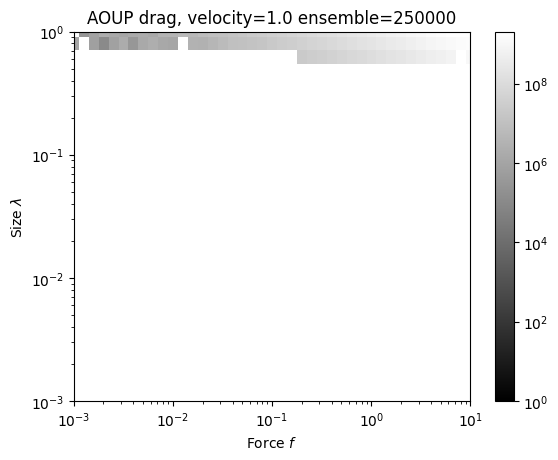

In [7]:
fig, ax = plt.subplots()
velocity = 1.0

drag, std = get_drag_by_velocity(df, velocity=velocity)
print(np.log10(drag.max()), np.log10(-drag.min()))

c = ax.pcolormesh(available_slope, available_Lambda, drag, shading="auto", 
                  norm=LogNorm(vmin=1, vmax=drag.max()), cmap="binary_r")
# c = ax.pcolor(x, y, average, shading="auto",
#                norm=Normalize(vmin=average.min(), vmax=0.0), cmap="bone")

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim([1.e-3, 1.e1])
ax.set_ylim([1.e-3, 1])

ax.set_title(f"AOUP drag, velocity={velocity} ensemble={ensemble}")
ax.set_xlabel(rf"Force $f$")
ax.set_ylabel(rf"Size $\lambda$")

cbar = plt.colorbar(c)
plt.show()

In [9]:
pm_flag = drag/np.abs(drag)
data = np.log10(np.abs(drag))
data *= pm_flag
data[np.isnan(data)] = 0.0

print(f"max={data.max()} min={data.min()}")

max=9.310035025536223 min=-5.9445833378397195


/tmp/ipykernel_1490999/2480324359.py:1: RuntimeWarning: invalid value encountered in divide
  pm_flag = drag/np.abs(drag)
/tmp/ipykernel_1490999/2480324359.py:2: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(np.abs(drag))


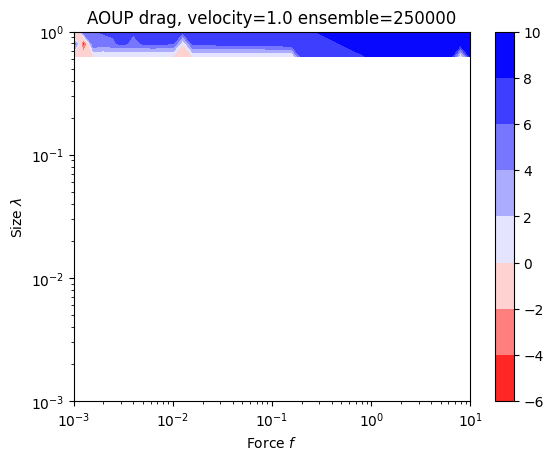

In [10]:
fig, ax = plt.subplots()

cvals  = [data.min(), 0, data.max()]
colors = ["red","white","blue"]
norm = plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals), colors))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", tuples)

c = ax.contourf(available_slope, available_Lambda, data, cmap=cmap, norm=norm)
# c = ax.pcolormesh(available_slope, available_Lambda, data, cmap=cmap, norm=norm)

ax.set_title(f"AOUP drag, velocity={velocity} ensemble={ensemble}")
ax.set_xlabel(rf"Force $f$")
ax.set_ylabel(rf"Size $\lambda$")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim([1.e-3, 1.e1])
ax.set_ylim([1.e-3, 1])

cbar = plt.colorbar(c)
# plt.savefig(f"./fig/AOUP drag, velocity={velocity}, ensemble={ensemble}.jpg")
plt.show()

/tmp/ipykernel_1490999/3655058020.py:3: RuntimeWarning: invalid value encountered in divide
  Z = drag / std


[[0.5        0.5        0.5        0.5        0.5        0.5
  0.5        0.5        0.5        0.5        0.5        0.5
  0.5        0.5        0.5        0.5        0.5        0.5
  0.5        0.5        0.5        0.5        0.5        1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         0.5        1.        ]
 [0.93615152 0.26231173 0.83925257 0.56265489 0.85527236 0.99764439
  0.68155599 0.98015951 0.99940013 0.97367502 0.94709147 0.5
  0.99999238 0.99998303 1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.        ]
 [0.17198315 0.61722683 0.80499335 0.98304189 0.93747815 0.89833543
  0.95292968 0.9748953  0.93603207 0.99976684 0.99993149 1.
  0.99999999 1.         

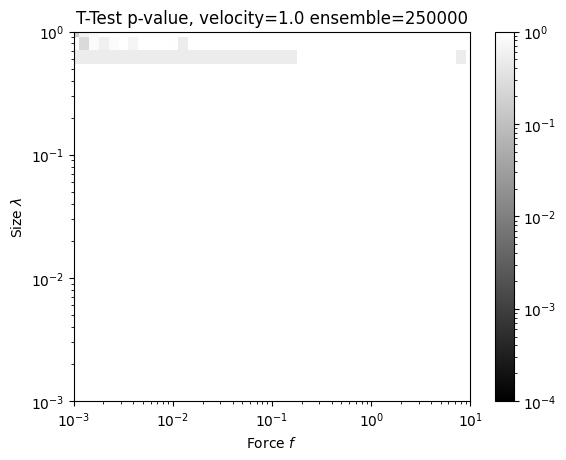

In [11]:
from scipy.stats import norm

Z = drag / std
Z[np.isnan(Z)] = 0.0

p_value = norm.cdf(Z)
print(p_value)
print(p_value.min())

fig, ax = plt.subplots()

# c = ax.contourf(available_slope, available_Lambda, p_value, shading='auto',
#                norm=LogNorm(vmin=1.e-4, vmax=1), cmap="binary_r")
c = ax.pcolormesh(available_slope, available_Lambda, p_value, shading='auto',
               norm=LogNorm(vmin=1.e-4, vmax=1), cmap="binary_r")

ax.set_title(f"T-Test p-value, velocity={velocity} ensemble={ensemble}")
ax.set_xlabel(rf"Force $f$")
ax.set_ylabel(rf"Size $\lambda$")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim([1.e-3, 1.e+1])
ax.set_ylim([1.e-3, 1])

cbar = plt.colorbar(c)
# plt.savefig(f"./fig/T-Test p-value, velocity={velocity}, ensemble={ensemble}.jpg")
plt.show()

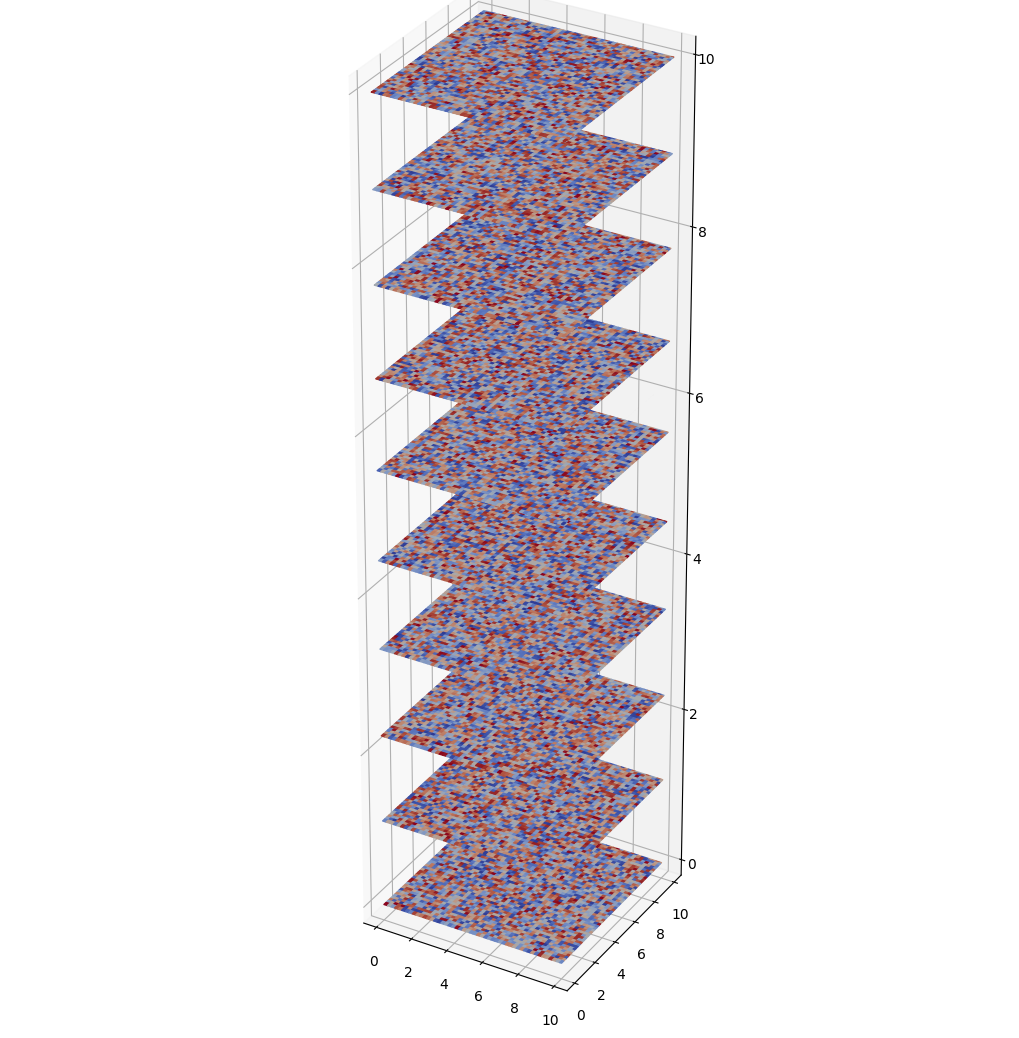

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.colors

X = np.linspace(0, 10, 100)
Y = np.linspace(0, 10, 100)
X, Y = np.meshgrid(X, Y)

rng = np.random.default_rng()
energy = 2 * rng.random([100,100,10]) - 1

fig = plt.figure(figsize=(10,20))
# ax = fig.add_subplot(projection='3d')
ax = plt.axes([0, -1, 1, 2],projection='3d')
norm = matplotlib.colors.Normalize(vmin=np.min(energy),vmax=np.max(energy))

for n, z in enumerate(list(np.linspace(0,10,10))):
    Z = np.zeros_like(X)+z
    ax.plot_surface(X, Y, Z, facecolors = cm.coolwarm(norm(energy[:,:,n])));

ax.set_box_aspect((1, 1, 4))

plt.show()

In [13]:
import numpy as np
import numpy.typing as npt

def get_logspace(
    max_value: float,
    num: int,
) -> npt.NDArray:

    logspace = [max_value]

    for i in range(int(np.round((num-1)/2, 0))):
        logspace.append(max_value*0.3/10**i)
        logspace.append(max_value*0.1/10**i)

    return np.array(logspace)

In [14]:
print(get_logspace(1.0, 9))

[1.e+00 3.e-01 1.e-01 3.e-02 1.e-02 3.e-03 1.e-03 3.e-04 1.e-04]
